# Atomic Orbitals
### Christina Lee
### Physics Prerequisites: Quantum Mechanics

Electrons around a nucleus.  Do they look like little well behaved planets orbiting a sun?  

NOPE!

We get spread out blobs in special little patterns called orbitals.  Here, we will look at their shapes and properties a bit.  Today we will look at graphs in 1D and 2D.  

The Hamiltonian for our problem is:

\begin{equation}
{\cal H}\Psi(x) =\left[ -\frac{\hbar}{2 m} \nabla^2 - \frac{Z e^2}{4 \pi \epsilon_0 r}\right]\Psi(x) = E \Psi(x)
\end{equation}
with
\begin{equation}
\nabla^2= \frac{1}{r^2}\frac{\partial}{\partial r} \left(
r^2 \frac{\partial}{\partial r}
\right)+ 
\frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta} \left(
\sin \theta \frac{\partial}{\partial \theta}
\right)+
\frac{1}{r^2 \sin^2 \theta} \frac{\partial^2}{\partial \phi^2}
\end{equation}

To solve this problem, we begin by guessing a solution with seperated Radial and Angular variables,
\begin{equation}
\Psi(x) = R(r) \Theta ( \theta,\phi)
\end{equation}

\begin{equation}
\frac{E r^2 R(r)}{2r R^{\prime}(r) + r^2 R^{\prime \prime}(r)}=
\frac{\left( \frac{1}{\sin \theta} \frac{\partial}{\partial \theta} \left(
\sin \theta \frac{\partial \Theta(\theta,\phi)}{\partial \theta}
\right)+
\frac{1}{\sin^2 \theta} \frac{\partial^2 \Theta(\theta,\phi)}{\partial \phi^2}\right)      }{\Theta( \theta, \phi)}
=C
\end{equation} 

Instead of going into the precise mechanisms of solving this differential equation from scratch seperate equations here, I'm only going to present the solution in terms of special functions that we can send to the [GNU Scientific Library](https://www.gnu.org/software/gsl/), GSL.

The overall eigenstate is given by
\begin{equation}
\Psi(\vec{x})= N R^{n,l}(\rho (r) )  Y^m_l (\theta,\phi)
\end{equation}

with the angular solution:
\begin{equation}
        Y^m_l(θ,ϕ) = (-1)^m e^{i m \phi} P^m_l (\cos(θ))
\end{equation}
where $P^m_l (x)$ is the [associated Legendre Polynomial](http://mathworld.wolfram.com/AssociatedLegendrePolynomial.html).

The radial solution is:
\begin{equation}
    R^{n,l} (\rho) = \rho^l e^{-\rho/2} L^{2 l+1}_{n-l-1} (\rho)
\end{equation}
where $L^{2 l+1}_{n-l-1}(\rho)$ is the [generalized Laguerre polynomial](http://mathworld.wolfram.com/LaguerrePolynomial.html).  
Instead of $r$, we deal with $\rho$, a scaled function of $r$:
\begin{equation}
    \rho=\frac{2r}{n a_0}
\end{equation}
Everything is normalized by:
\begin{equation}
    N=\sqrt{\left(\frac{2}{n}\right)^3 \frac{(n-l-1)}{2n(n+l)!}}
\end{equation}



In [12]:
using GSL;    #GSL holds the special functions
using Plots;
pyplot()

Plots.PyPlotBackend()

#### Cell to Evaluate
What's below is a bunch of definitions that makes our calculations easier later on.  Here I utilize the GNU scientific library, GSL imported above, to calculate the special functions.  

#### <b>Programming Tip!</b>
Even though its not necessary, specifying the type of inputs to a function through `m::Int` helps prevent improper inputs and allows the compiler to perform additional optimizations.  Julia also implements <i>Abstract Types</i>, so we don't have to specify the exact type of Int.  Real allows and numerical, non-complex type.  

Type greek characters in Jupyter notebooks via LaTeX syntax.  ex: \alpha+tab

The function `Orbital` throws `DomainError()` when `l` or `m` do not obey their bounds.  Julia supports a wide variety of easy to use error messages.

In [13]:
a0=1; #for convenience, or 5.2917721092(17)×10−11 m

# The unitless radial coordinate
ρ(r,n)=2r/(n*a0);

#The θ dependence
function Pmlh(m::Int,l::Int,θ::Real)
    return (-1.0)^m *sf_legendre_Plm(l,m,cos(θ)); 
end

#The θ and ϕ dependence
function Yml(m::Int,l::Int,θ::Real,ϕ::Real)
    return  (-1.0)^m*sf_legendre_Plm(l,m,cos(θ))*exp(im*m*ϕ)
end

#The Radial dependence
function R(n::Int,l::Int,ρ::Real)
    if isapprox(ρ,0)
        ρ=.01
    end
     return sf_laguerre_n(n-l-1,2*l+1,ρ)*exp(-ρ/2)*ρ^l
end

#A normalization: This is dependent on the choice of polynomial representation
function norm(n::Int,l::Int)
    return sqrt((2/n)^3 * factorial(n-l-1)/(2n*factorial(n+l)))
end
"Orbital Components"

"Orbital Components"

In [14]:
#Generates an Orbital Funtion of (r,θ,ϕ) for a specificied n,l,m.  
function Orbital(n::Int,l::Int,m::Int)
    if l>n    # we make sure l and m are within proper bounds    
        throw(DomainError())
    end
    if abs(m)>l
        throw(DomainError())
    end
    psi(ρ,θ,ϕ)=norm(n, l)*R(n,l,ρ)*Yml(m,l,θ,ϕ);
    return psi
end
"Orbital Function"

"Orbital Function"

In [15]:
#We will calculate in spherical coordinates, but plot in cartesian, so we need this array conversion
function SphtoCart(r::Array,θ::Array,ϕ::Array)
    x=r.*sin.(θ).*cos.(ϕ);
    y=r.*sin.(θ).*sin.(ϕ);
    z=r.*cos.(θ);
    return x,y,z;
end

function CarttoSph(x::Array,y::Array,z::Array)
    r=sqrt.(x.^2 .+y.^2 .+z.^2);
    θ=acos.(z./r);
    ϕ=atan.(y./x);
    return r,θ,ϕ; 
end

"Coordinate Functions"

"Coordinate Functions"

#### Parameters  

For the Orbital Parameters: 
\begin{equation}
0<n \qquad 0 \leq l < n \qquad -l \leq m \leq l
\qquad n,l,m \in {\mathbb Z}
\end{equation}

In [16]:
# Choose the Orbitals to look at
n=[3,3,2,2,2];
l=[1,2,1,1,0];
m=[0,0,1,0,0];
nΨ=length(n); # number of parameter combinations to look at

Nplot=100; # number of points to plot per dimension

Ψa=Function[] # Array of our Orbital Functions
for ii in 1:nΨ
    push!(Ψa,Orbital(n[ii],l[ii],m[ii]) )
end
"Defined parameters"

"Defined parameters"

## Plotting

### Theta Slice
$l$ angular nodes exist for a given wavefunction, so as we proceed through a $\pi$ rotation, we should hit zero $l$ times in total.

$m$, the magnetic quantum number, rotates the location that the angular nodes occur. I chose one $m=1$ wavefunction, and this wavefunction intercepts zero at at a different location than its $m=0$ counterpart.

Go ahead and change the `r_loc` and `ϕ_loc` parameters to see how the slice changes as we change where we take it.

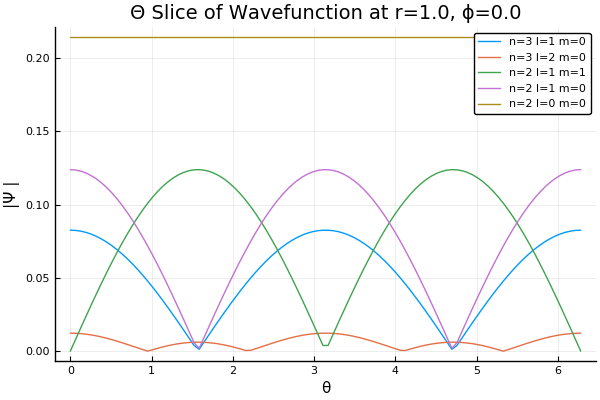

In [17]:
r_loc=1. # r location of slice
ϕ_loc=0. # ϕ location of slice

θ=range(0,stop=2π,length=Nplot)

plot()
for ii in 1:nΨ
    plot!(θ,abs.(Ψa[ii].(1.,θ,0.)),
        label="n=$(n[ii]) l=$(l[ii]) m=$(m[ii])")
end

plot!(xlabel="θ",ylabel="|Ψ |",
    title="Θ Slice of Wavefunction at r=$(r_loc), ϕ=$(ϕ_loc)")

### R Slice

The wavefunction has $n-1$ nodes in total, with $l$ of those going to angular nodes.  The remaining $n-l-1$ nodes are radial nodes, which we can see when taking a radial slice. The wavefunction hitting zero at the origin is a byproduct of angular nodes.

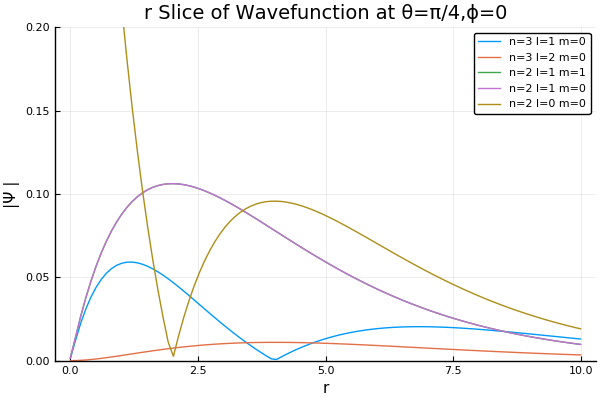

In [18]:
θ_loc=π/4 # θ location of slice
θ_loc_name="π/4" #format nice with pi
ϕ_loc=0   #  ϕ location of slice

r=range(0,stop=10,length=Nplot)

plot()
for ii in 1:nΨ
    plot!(r,abs.(Ψa[ii].(r,π/4,0.)) ,
        label="n=$(n[ii]) l=$(l[ii]) m=$(m[ii])")
end

plot!(xlabel="r",ylims=(0,.2),ylabel="|Ψ |",
    title="r Slice of Wavefunction at θ="*θ_loc_name*",ϕ=$(ϕ_loc)")

Next, we will look at two dimensional slices. I chose the $y=0$ plane, as the $z=0$ tends to correspond to an angular mode in several of my chosen wavefunctnions.  Much more clearly than the 1D slices, these show the presence of the nodes.

In [19]:
# the two dimensions we iterate over
x=range(-8,stop=8,length=Nplot)
z=range(-8,stop=8,length=Nplot)

# creating a 2D 
xx=repeat(x,outer=[1,Nplot])
zz=repeat(transpose(z),outer=[Nplot,1])
yy=zeros(Float64,Nplot,Nplot)

r2, θ2, ϕ2=CarttoSph(xx,yy,zz);

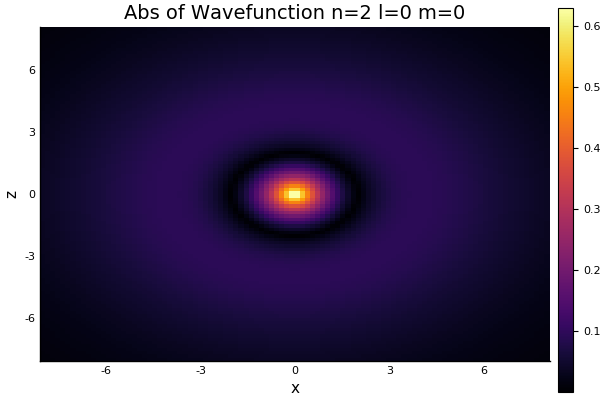

In [20]:
ii=5
heatmap(x,z,abs.(Ψa[ii].(r2,θ2,ϕ2)))
plot!(xlabel="x",ylabel="z",
    title="Abs of Wavefunction n=$(n[ii]) l=$(l[ii]) m=$(m[ii])")

### Saved Examples

![slice 1](../images/Orbitals/xz_slice1.png)
![slice 2](../images/Orbitals/xz_slice2.png)
![slice 3](../images/Orbitals/xz_slice3.png)
![slice 4](../images/Orbitals/xz_slice4.png)
![slice 5](../images/Orbitals/xz_slice5.png)

## Values on a sphere

Finally I pull out points at a fixed radius on a sphere.  By just using colored scatter points, we can still effectively get a picture of the angular behaviour of the wavefunction.

In [21]:
θ3=repeat(θ,outer=[1,100])
ϕ3=repeat(transpose(θ),outer=[100,1])
r3=ones(Float64,100,100)

x3,y3,z3=SphtoCart(r3,θ3,ϕ3);

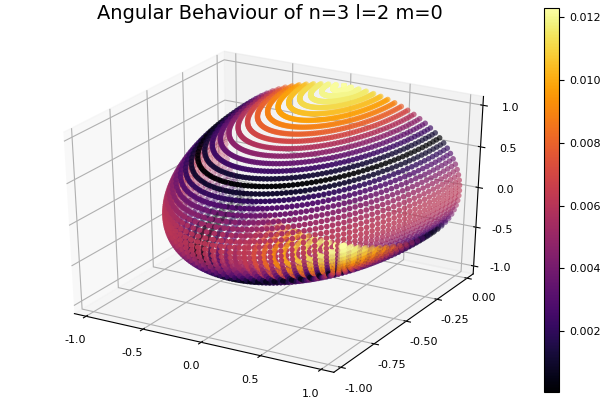

In [34]:
choice=2

y3pr=reshape(y3,10000)
y3p=y3pr[y3pr.<0]
x3p=reshape(x3,10000)[y3pr.<0]
z3p=reshape(z3,10000)[y3pr.<0]
col=reshape(abs.(Ψa[choice].(r3,θ3,ϕ3)),10000)[y3pr.<0]

scatter(x3p,y3p,z3p,marker_z=col,
    label="",markerstrokewidth=0)
plot!(title="Angular Behaviour of n=$(n[choice]) l=$(l[choice]) m=$(m[choice])")


Happy Programming :)